In [1]:
from sklearn import datasets 
import matplotlib.pyplot as plt 
import numpy as np
import math
from collections import defaultdict
from functools import reduce

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


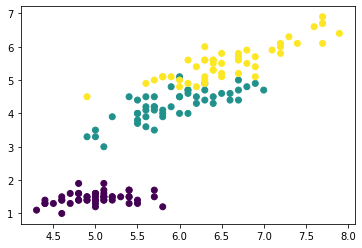

In [2]:
iris_df = datasets.load_iris() 
print(dir(iris_df)) 
print(iris_df.feature_names) 
print(iris_df.target) 
print(iris_df.target_names)
label = {0: 'red', 1: 'blue', 2: 'green'} 
x_axis = iris_df.data[:, 0]  # Sepal Length 
y_axis = iris_df.data[:, 2]  # Sepal Width 
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

In [3]:
class MyKNeighborsClassifier:
    def __init__(self, n_clusters=3, iteration=100):
        self.n_clusters = n_clusters
        self.X_train = None
        self.result_dict = {}
        self.iteration = 100
        
    def fit(self, X):
        self.X_train = X
        self.x_index_dict = {i:v for i,v in enumerate(self.X_train)}
        self.centers = {i:self.x_index_dict[i] for i, v in 
                        enumerate(np.random.choice(list(self.x_index_dict.keys()), self.n_clusters))}
        self.find_closest_center()
        change = 1
        i = 0
        while i < self.iteration and change > 0:
            tmp = defaultdict(list)
            for k, v in self.result_dict.items():
                tmp[v].append(k)
            self.centers = {k:np.mean([self.x_index_dict[i] for i in v], axis=0) for k, v in tmp.items()}
            old_result = self.result_dict.copy()
            self.find_closest_center()
            change = self.check_stop_cri(old_result)
            i+=1
        return self.result_dict
            
            
    
    def find_closest_center(self):
        for k, v in self.x_index_dict.items():
            small_index = None
            small_distance = math.inf
            for i, c in self.centers.items():
                d = np.linalg.norm(v - c)
                if d < small_distance:
                    small_distance = d
                    small_index = i
            self.result_dict[k] = small_index
            
    def check_stop_cri(self, old_result):
        count = 0
        for i in range(len(old_result)):
            if old_result[i] == self.result_dict[i]:
                count += 1
        return 1-(count / len(old_result))

In [4]:
result = MyKNeighborsClassifier().fit(iris_df.data)

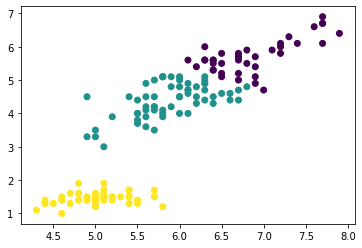

In [5]:
plt.scatter(x_axis, y_axis, c=[v for i, v in result.items()])
plt.show()